In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
insurance_df = pd.read_csv('insurance.csv')

In [8]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Exploratory Data Analysis

<Axes: >

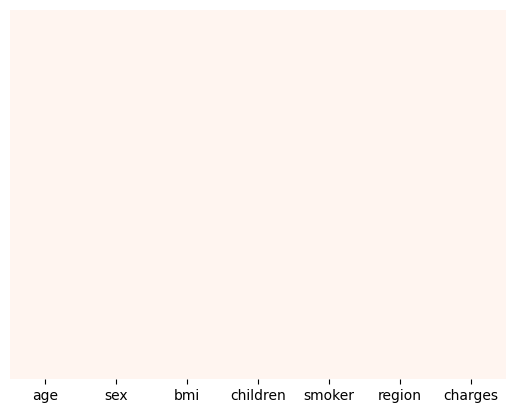

In [9]:
sns.heatmap(insurance_df.isnull(),yticklabels = False, cbar=False,cmap = 'Reds')

In [10]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
# Try to convert everything into numerical values Before that make a copy of df
insurance_df_copy = insurance_df.copy()

In [14]:
# check unique values of Sex column and convert them into numerical values
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [15]:
# changeing sex into numeric values
insurance_df['sex'] = insurance_df['sex'].apply(lambda x : 0 if x=='female' else 1)

In [16]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [17]:
# lets ccheck for unique values of smoker
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [18]:
# convert the smoker column to numeric values
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x : 0 if x=='no' else 1)

In [19]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [20]:
# lets change the region columns
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [22]:
# we have 4 unique values so lets creat seperate columns for each region 
# first get the dummies this way we sepeate regions into columns
region_dummies = pd.get_dummies(insurance_df['region'],drop_first = True) # by setting True we drop one of the highly correlated columns
region_dummies

,northwest,southeast,southwest
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False
...,...,...,...
1333,True,False,False
1334,False,False,False
1335,False,True,False
1336,False,False,True


In [23]:
# Convert the boolean values into int 
region_dummies = region_dummies.astype(int)

In [24]:
region_dummies.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [25]:
# now concatinate these region values into the dataframe
insurance_df = pd.concat([insurance_df,region_dummies],axis = 1)

In [27]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [28]:
# lets delete the region column now
insurance_df.drop(['region'],axis = 1, inplace = True)

In [29]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northwest  1338 non-null   int64  
 7   southeast  1338 non-null   int64  
 8   southwest  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


# Visual Analysis of Data

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

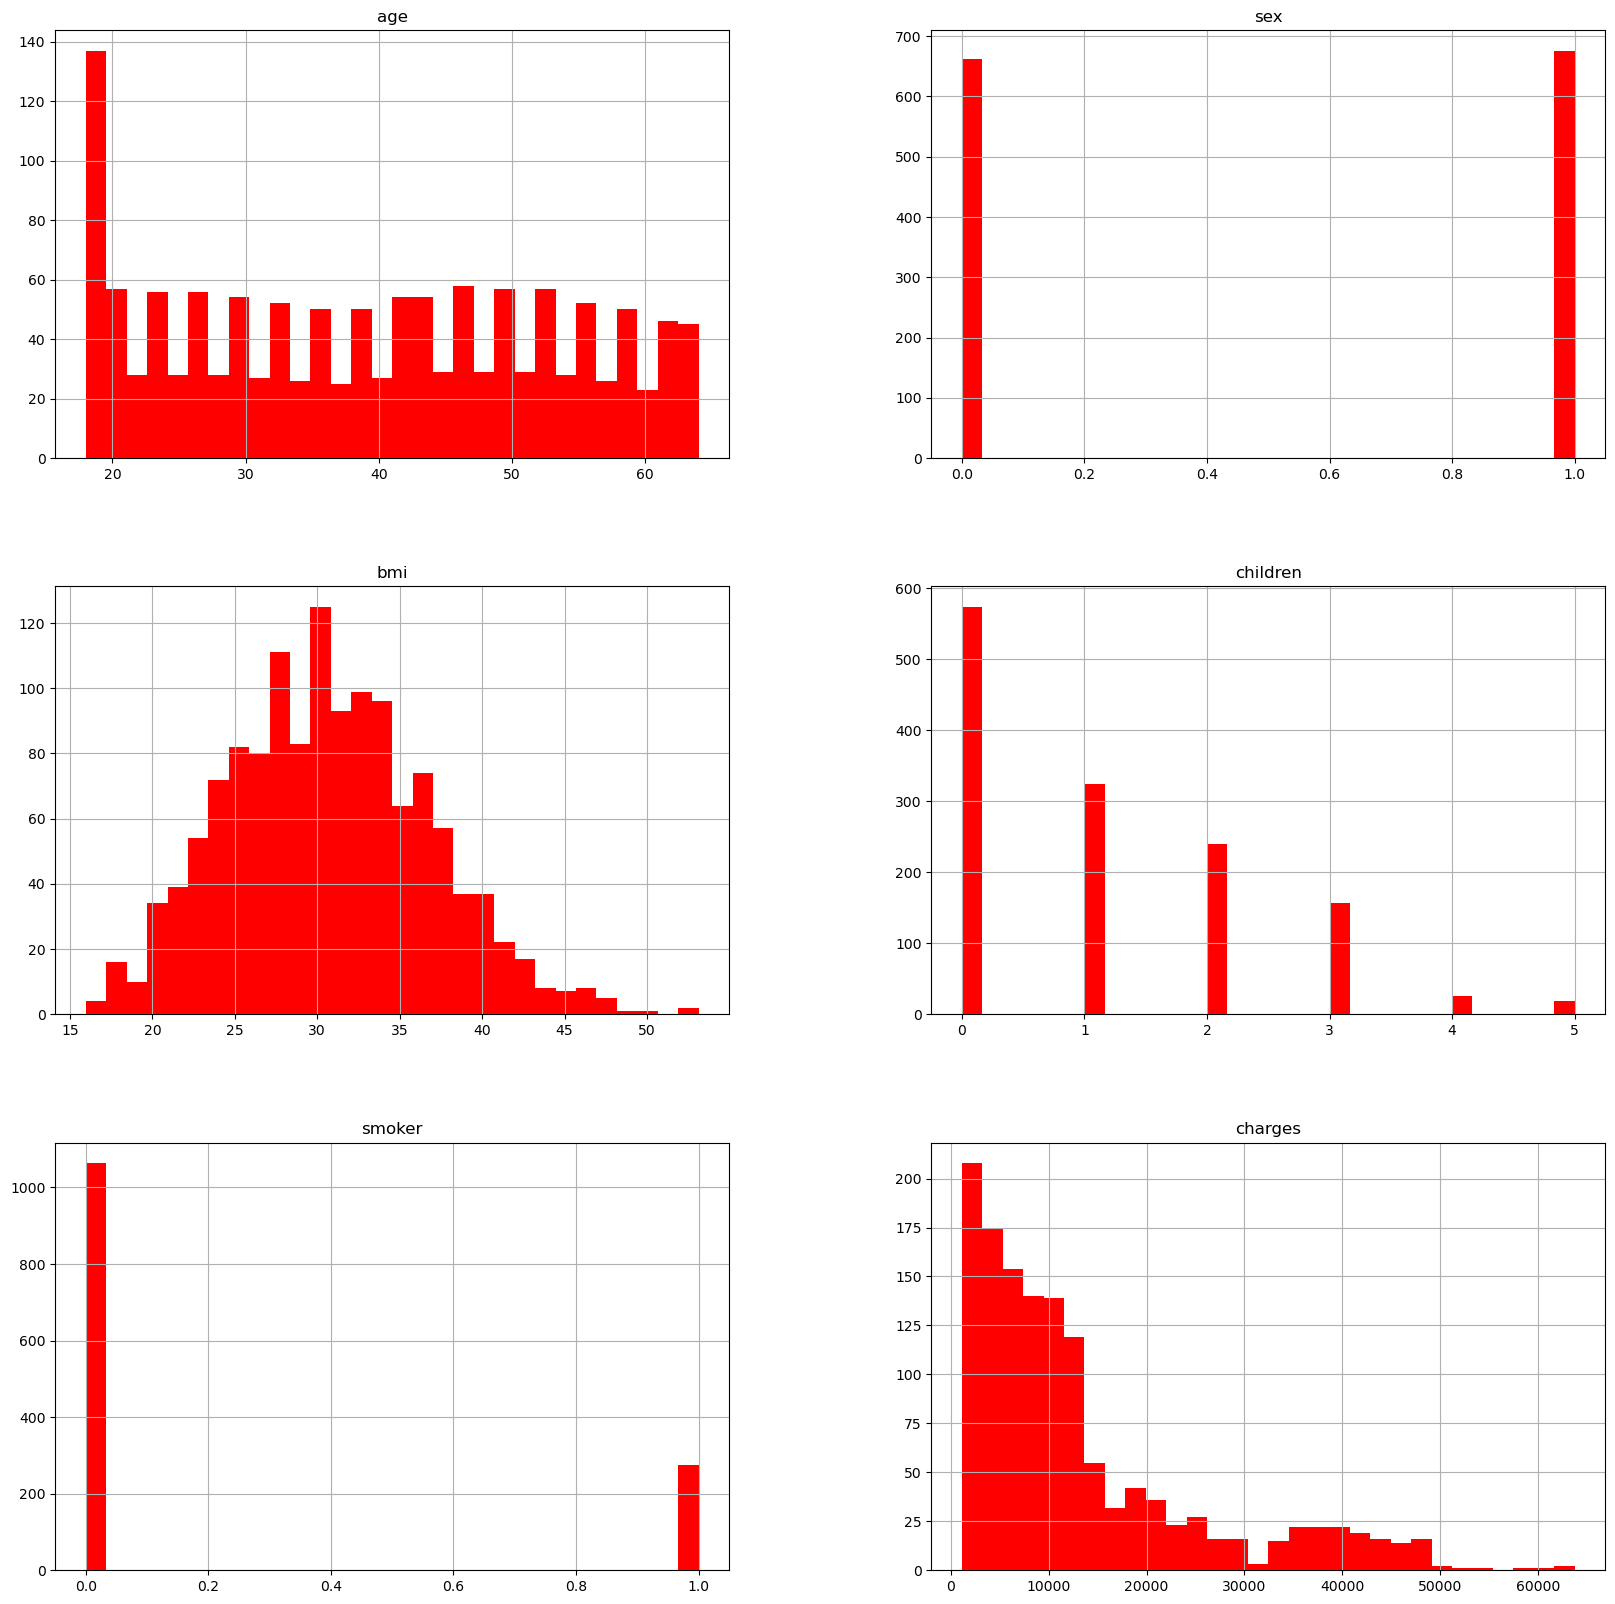

In [30]:
insurance_df[['age','sex','bmi','children','smoker','charges']].hist(bins = 30,figsize = (20,20),color = 'r')

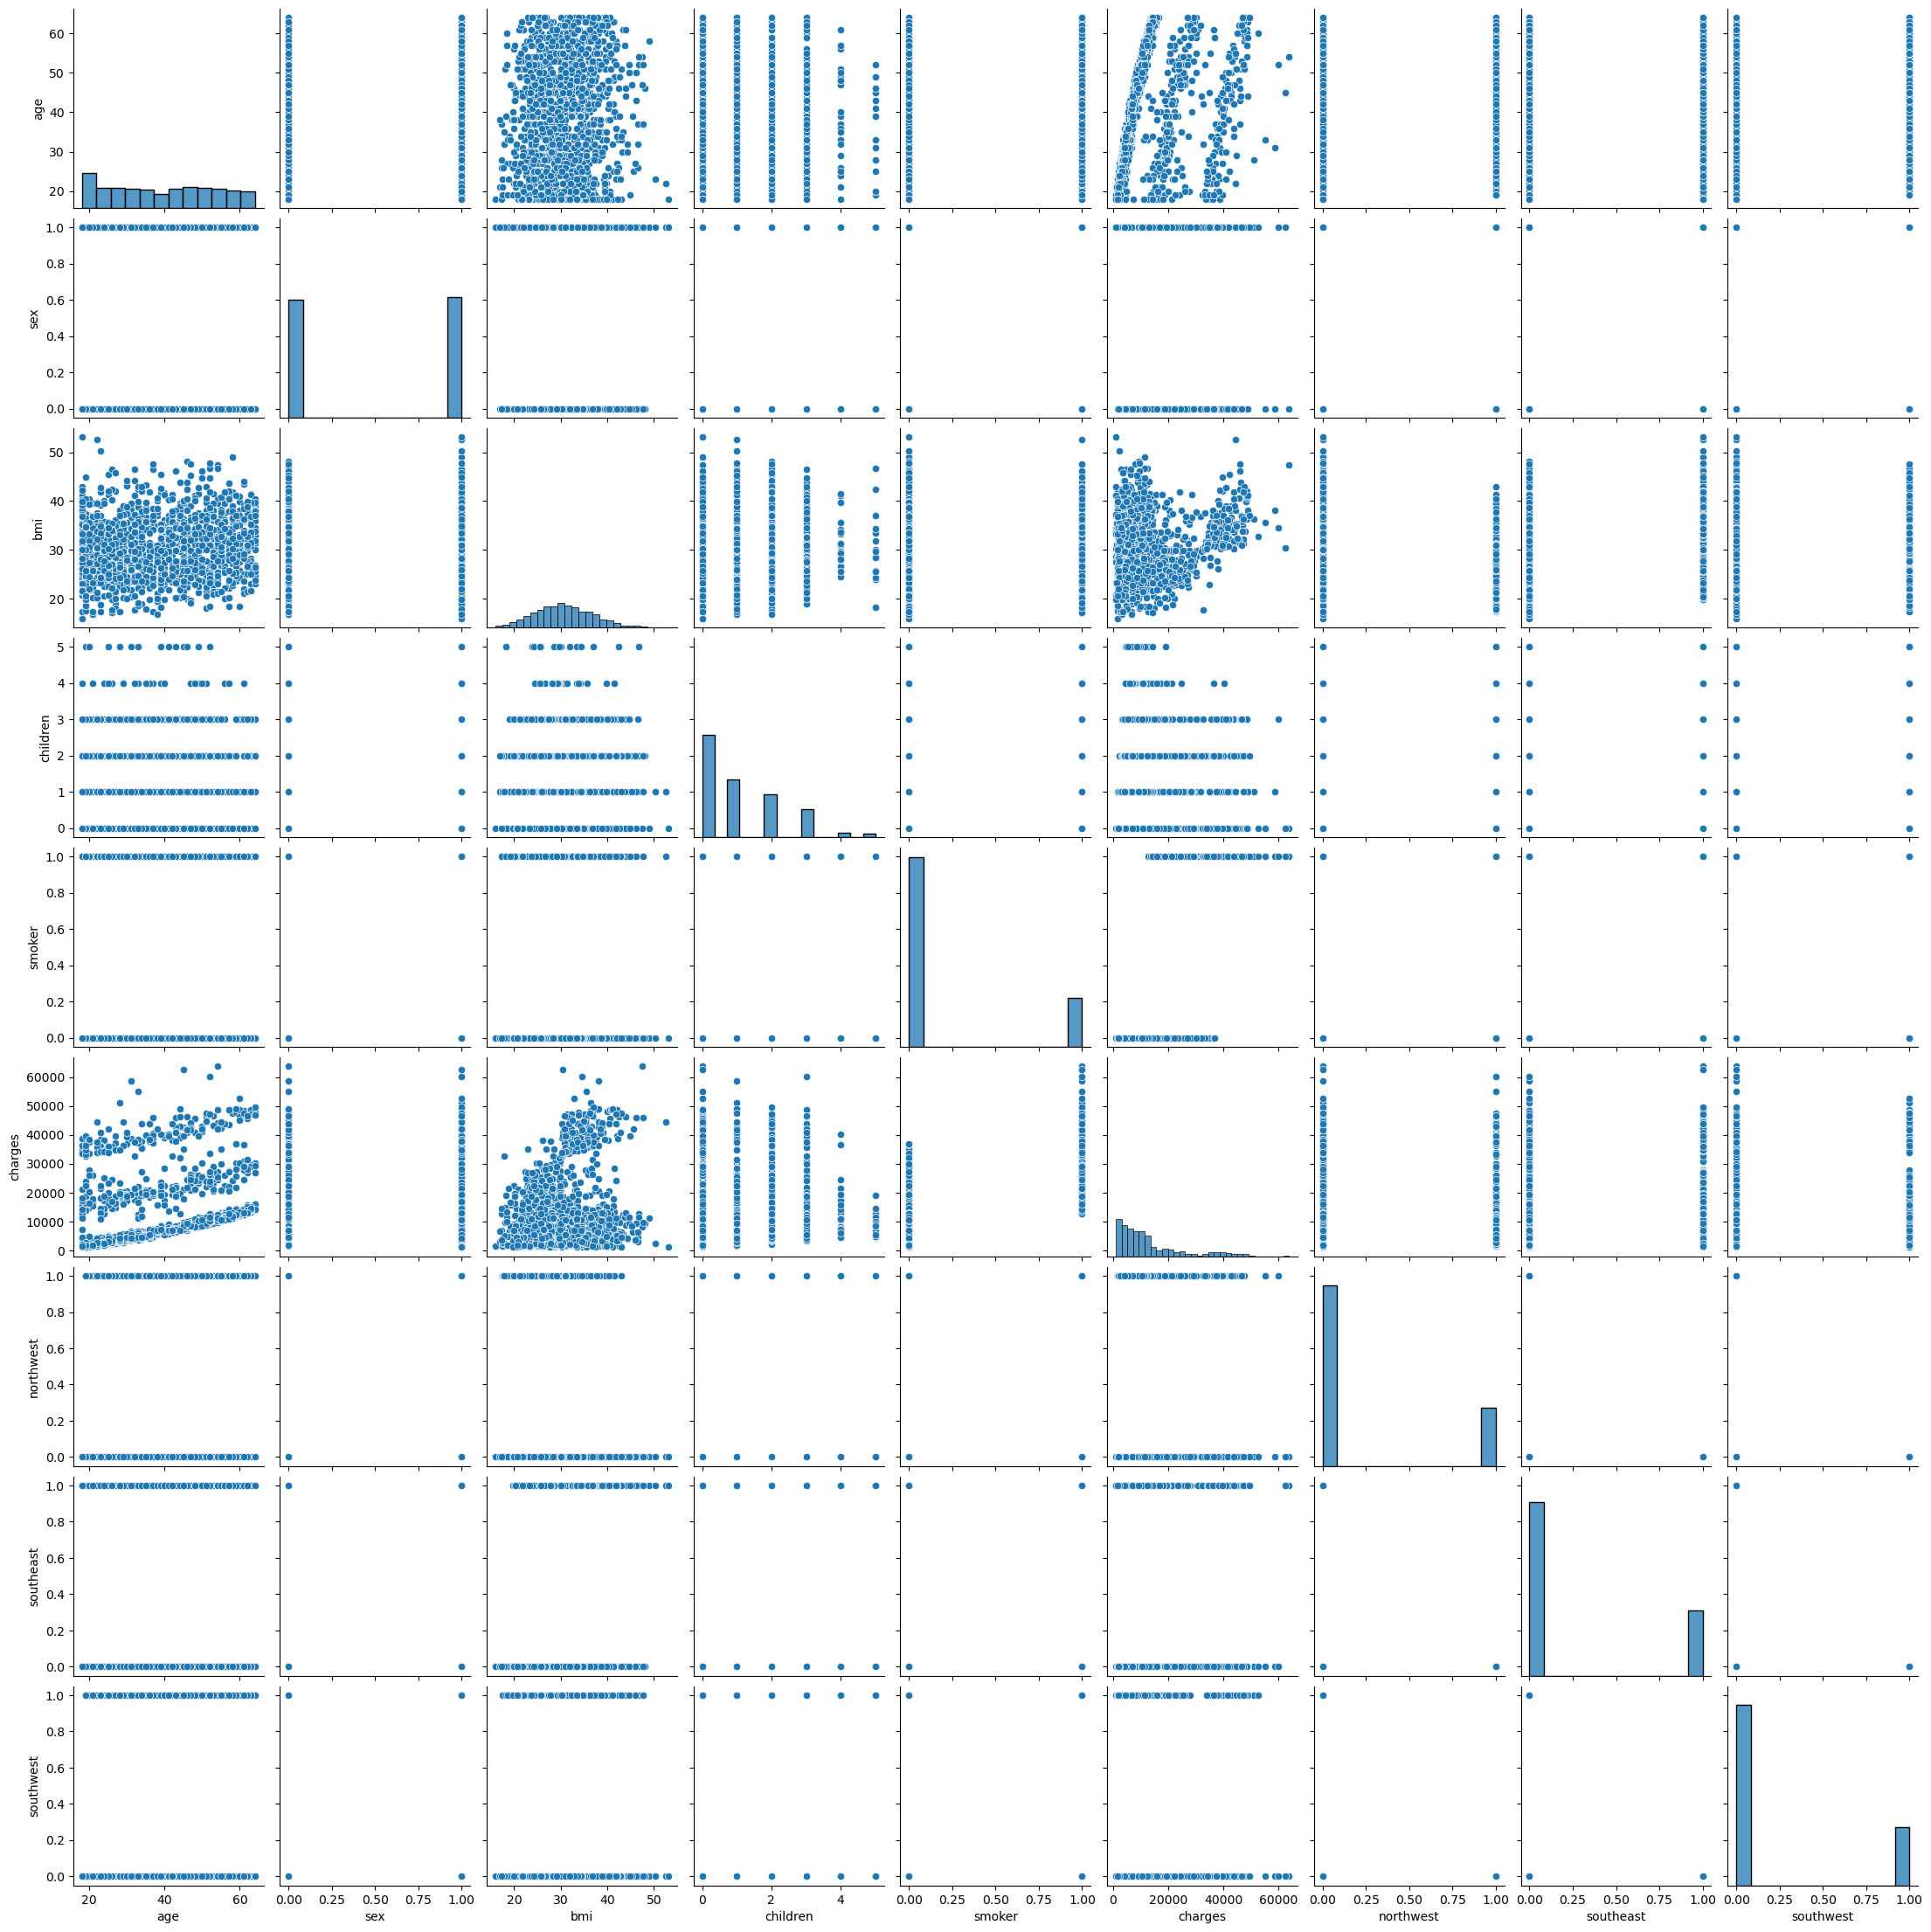

In [31]:
sns.pairplot(insurance_df)

<Axes: xlabel='age', ylabel='charges'>

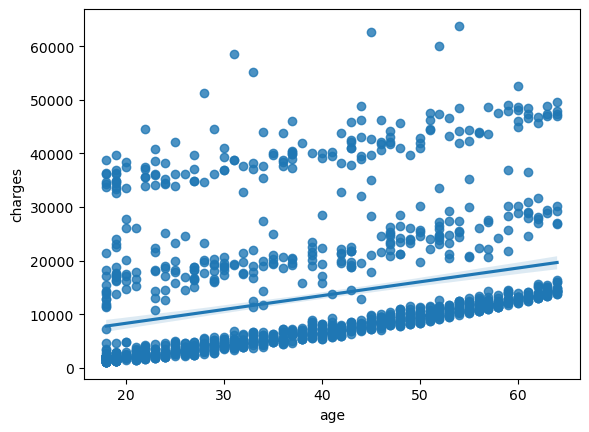

In [32]:
# try to fit straight line between the age and charges
sns.regplot(x = 'age',y='charges',data = insurance_df)

In [34]:
# lets see how the columns are correlated
corr = insurance_df.corr()
corr

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


<Axes: >

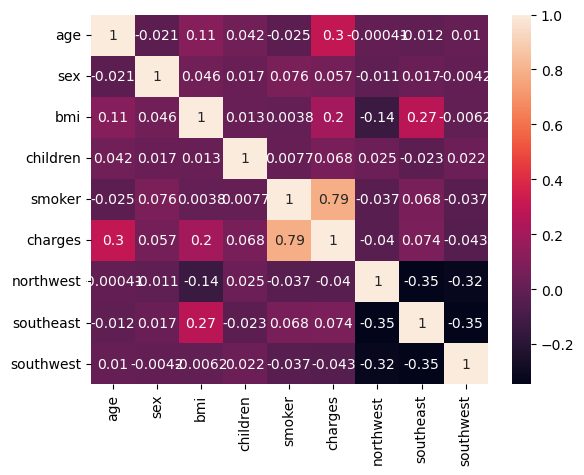

In [35]:
# lets plot this into heat map for clear visualization
sns.heatmap(corr,annot = True)

In [36]:
# this shows smoker and charges are highly correlated

In [37]:
# lets create training and Testing data sets

# we need to calculate insurance charges based on age,sex,region,smoking habbits , children , bmi
# so input columns will be age, bmi,amoker,region, children
X = insurance_df.drop(columns = ['charges'])
y = insurance_df['charges']

In [38]:
# convert the data array of float 32
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [39]:
# check the shape of x and y
X.shape

(1338, 8)

In [40]:
y.shape

(1338,)

In [43]:
# convert y labels into array
y = y.reshape(-1,1)

In [44]:
y.shape

(1338, 1)

In [48]:
# scale data before training ml model
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scalar_y = StandardScaler()
y = scalar_y.fit_transform(y)

In [50]:
X[0]

array([-1.4387642 , -1.0105187 , -0.45332006, -0.9086137 ,  1.9705867 ,
       -0.5664179 , -0.61132365,  1.765481  ], dtype=float32)

In [52]:
# splitting data test size = 20% of data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [53]:
# lets see if the split is done properly the addition of X_train size and X_test size whould be equal to X Size
X_train.shape

(1070, 8)

In [54]:
X_test.shape

(268, 8)

In [55]:
y_train.shape

(1070, 1)

# train Sagemaker Model

In [56]:
import sagemaker
import boto3

sagemaker_session = sagemaker.Session()
bucket = 'medical-insurance-premium'
prefix = 'linear-learner'

role = sagemaker.get_execution_role()
print(role)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
arn:aws:iam::846247541837:role/service-role/AmazonSageMaker-ExecutionRole-20251006T120145


In [58]:
# write train and test data into s3 bucket . Before that convert the input data into recordio format
import io
import os
import sagemaker.amazon.common as smac

buf = io.BytesIO()

# y lables must be vectors so we are reshaping 
smac.write_numpy_to_dense_tensor(buf,X_train,y_train.reshape(-1))

# get back the buffer pointer to 0 so we can read the entire file from beginning
buf.seek(0)

key = 'linear-train-data'

# here train folder is created and data will be uploaded into that folder

boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix,'train',key)).upload_fileobj(buf)

s3_train_data = "s3://{}/{}/train/{}".format(bucket,prefix,key)

print("Uploaded training data at : {}".format(s3_train_data))


Uploaded training data at : s3://medical-insurance-premium/linear-learner/train/linear-train-data


In [60]:
# uploading test data into s3 bucket
buf = io.BytesIO()

smac.write_numpy_to_dense_tensor(buf,X_test,y_test.reshape(-1))

buf.seek(0) # making sure the buf file is not closed

# create a sub folder 'train' to store train data

key = 'linear-test-data'

boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix,'test',key)).upload_fileobj(buf)

s3_test_data = 's3://{}/{}/test/{}'.format(bucket,prefix,key)

print('Uploaded test data at : {}'.format(s3_test_data))

Uploaded test data at : s3://medical-insurance-premium/linear-learner/test/linear-test-data


In [62]:
# lets create an ouput folder where the artifacts of the model are stored
artifacts = 's3://{}/{}/output'.format(bucket,prefix)
print("Training artifacts will be uploaded at :{}".format(artifacts))

Training artifacts will be uploaded at :s3://medical-insurance-premium/linear-learner/output


In [63]:
# get the model image from repository
from sagemaker.amazon.amazon_estimator import image_uris
container = image_uris.retrieve('linear-learner',boto3.Session().region_name)

In [64]:
linear = sagemaker.estimator.Estimator(container,
                                       role,
                                       train_instance_count = 1,
                                       train_instance_type = 'ml.c4.xlarge',
                                       output_path = artifacts,
                                       sagemaker_session = sagemaker_session)

linear.set_hyperparameters(feature_dim = 8,#8 input variables are passed
                           predictor_type = 'regressor',
                           mini_batch_size = 100,
                           epochs = 100,
                           num_models = 32,
                           loss = 'absolute_loss')

linear.fit({'train':s3_train_data})

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: linear-learner-2025-10-06-20-42-06-278


2025-10-06 20:42:07 Starting - Starting the training job...
2025-10-06 20:42:22 Starting - Preparing the instances for training...
2025-10-06 20:42:47 Downloading - Downloading input data...
2025-10-06 20:43:17 Downloading - Downloading the training image.........
2025-10-06 20:45:09 Training - Training image download completed. Training in progress...Docker entrypoint called with argument(s): train
Running default environment configuration script
[10/06/2025 20:45:18 INFO 139727052150592] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss

In [76]:
linear_regressor = linear.deploy(initial_instance_count = 1,
                                 instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: linear-learner-2025-10-06-21-02-22-186
INFO:sagemaker:Creating endpoint-config with name linear-learner-2025-10-06-21-02-22-186
INFO:sagemaker:Creating endpoint with name linear-learner-2025-10-06-21-02-22-186


----------!

In [77]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

linear_regressor.serializer = CSVSerializer()
linear_regressor.deserializer = JSONDeserializer()

In [78]:
result = linear_regressor.predict(X_test)
result

{'predictions': [{'score': -1.0156868696212769},
  {'score': -0.8930671811103821},
  {'score': 1.085062861442566},
  {'score': -0.7135633230209351},
  {'score': -0.9217112064361572},
  {'score': 1.1465147733688354},
  {'score': -0.8700886368751526},
  {'score': -0.6171156167984009},
  {'score': -0.20395350456237793},
  {'score': -0.09266666322946548},
  {'score': -0.05983154475688934},
  {'score': 1.5020791292190552},
  {'score': -1.0150455236434937},
  {'score': 1.0105085372924805},
  {'score': -0.8989318609237671},
  {'score': -0.6551709175109863},
  {'score': -0.42375004291534424},
  {'score': -0.9799803495407104},
  {'score': -0.8227428197860718},
  {'score': 1.4091829061508179},
  {'score': -1.0113004446029663},
  {'score': -0.12284411489963531},
  {'score': -0.379294216632843},
  {'score': 0.7907002568244934},
  {'score': -0.4309546947479248},
  {'score': -0.9003576040267944},
  {'score': -0.8439993858337402},
  {'score': 1.4555182456970215},
  {'score': 0.000934988260269165},
  

In [79]:
predictions = np.array([res['score'] for res in result['predictions']])
predictions

array([-1.01568687e+00, -8.93067181e-01,  1.08506286e+00, -7.13563323e-01,
       -9.21711206e-01,  1.14651477e+00, -8.70088637e-01, -6.17115617e-01,
       -2.03953505e-01, -9.26666632e-02, -5.98315448e-02,  1.50207913e+00,
       -1.01504552e+00,  1.01050854e+00, -8.98931861e-01, -6.55170918e-01,
       -4.23750043e-01, -9.79980350e-01, -8.22742820e-01,  1.40918291e+00,
       -1.01130044e+00, -1.22844115e-01, -3.79294217e-01,  7.90700257e-01,
       -4.30954695e-01, -9.00357604e-01, -8.43999386e-01,  1.45551825e+00,
        9.34988260e-04, -6.29076958e-01, -8.03136081e-02, -6.78440183e-02,
        1.12496763e-02,  1.28476644e+00, -7.01914728e-01, -5.32751679e-01,
        4.77533817e-01, -1.13050863e-01, -8.98382843e-01, -2.19743967e-01,
       -5.51817000e-01, -6.39593661e-01,  8.69783521e-01, -4.11019266e-01,
       -5.10561168e-01, -2.44701862e-01, -2.32895315e-01, -2.91342318e-01,
       -6.52572215e-01, -1.13035895e-01,  1.07626331e+00, -9.38749313e-01,
        4.86594290e-02, -

In [82]:
# lets transform them into original format
y_predict_orig = scalar_y.inverse_transform(predictions.reshape(-1,1))
y_test_orig = scalar_y.inverse_transform(y_test)

In [84]:
# calculate the metrics r2,mse,rmse,adj_r2
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

n = len(X_test)
k = X_test.shape[1]

MSE = mean_squared_error(y_test_orig,y_predict_orig)
RMSE = float(format(np.sqrt(MSE),'.3f'))
MAE = mean_absolute_error(y_test_orig,y_predict_orig)
r2 = r2_score(y_test_orig,y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE = ',RMSE,'\nMSE = ',MSE, '\nMAE = ',MAE,'\nR2 = ',r2,'\nadj_r2 = ',adj_r2)

RMSE =  7078.901 
MSE =  50110834.102129094 
MAE =  3733.6742479528903 
R2 =  0.6577671978589525 
adj_r2 =  0.6471963004955226


In [85]:
# R2 value is not so great so we need to find a better model. 

# first delete the end point so we wont be charged extra
linear_regressor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2025-10-06-21-02-22-186
INFO:sagemaker:Deleting endpoint with name: linear-learner-2025-10-06-21-02-22-186
